In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve


In [ ]:
from google.colab import files
uploaded = files.upload()

df_raw = pd.read_csv(list(uploaded.keys())[0])
df_raw.head()

Saving telco_churn_raw.csv.csv to telco_churn_raw.csv.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df = df_raw.copy()
df.columns = df.columns.str.strip()
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip()

# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace("", np.nan)

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

df['TotalCharges'].head()

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'])

In [ ]:
num_cools = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
for col in num_cools:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
text_cols = ['customerID','gender','InternetService','Contract','PaymentMethod','Churn']
for col in text_cols:
  df[col] = df[col].astype(str).str.strip().str.title()

In [ ]:
df = df.drop_duplicates(subset = 'customerID')
df.shape

(7043, 21)

In [ ]:
df_Clean = df.copy()
df_Clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-Vhveg,Female,0,Yes,No,1,No,No phone service,Dsl,No,...,No,No,No,No,Month-To-Month,Yes,Electronic Check,29.85,29.85,No
1,5575-Gnvde,Male,0,No,No,34,Yes,No,Dsl,Yes,...,Yes,No,No,No,One Year,No,Mailed Check,56.95,1889.50,No
2,3668-Qpybk,Male,0,No,No,2,Yes,No,Dsl,Yes,...,No,No,No,No,Month-To-Month,Yes,Mailed Check,53.85,108.15,Yes
3,7795-Cfocw,Male,0,No,No,45,No,No phone service,Dsl,Yes,...,Yes,Yes,No,No,One Year,No,Bank Transfer (Automatic),42.30,1840.75,No
4,9237-Hqitu,Female,0,No,No,2,Yes,No,Fiber Optic,No,...,No,No,No,No,Month-To-Month,Yes,Electronic Check,70.70,151.65,Yes


In [ ]:
df = df_raw.copy()
df_clean = df.copy()

In [ ]:
df_clean.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

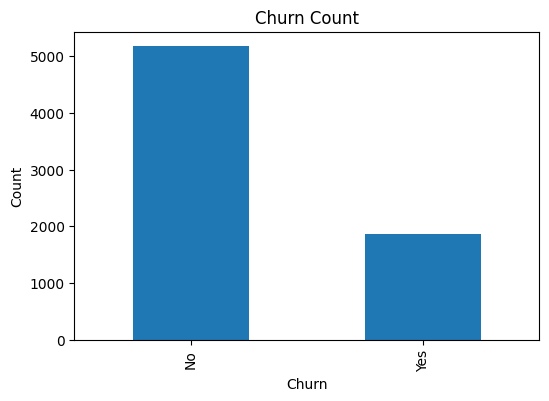

In [ ]:
plt.figure(figsize=(6,4))
df_clean['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

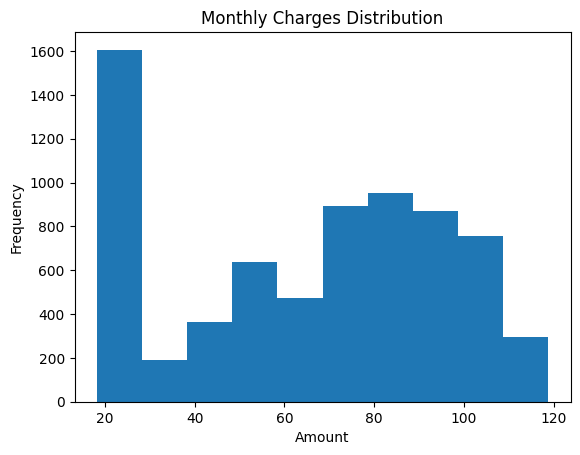

In [ ]:
plt.hist(df_clean['MonthlyCharges'])
plt.title("Monthly Charges Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

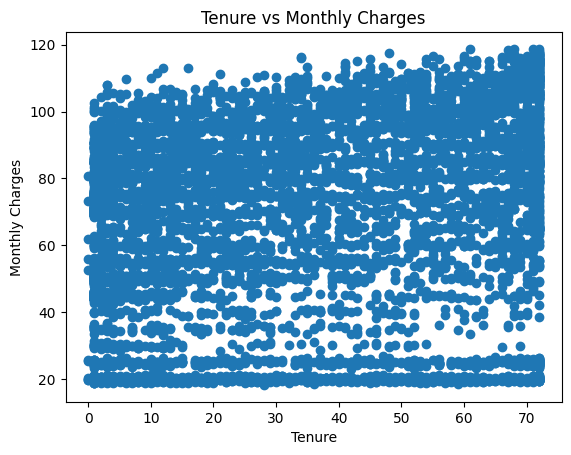

In [ ]:
plt.scatter(df_clean['tenure'], df_clean['MonthlyCharges'])
plt.title("Tenure vs Monthly Charges")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.show()

In [ ]:
X = df_clean[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']]
y = df_clean['Churn'].map({'Yes':1,'No':0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [ ]:
df_clean['Churn'] = df_clean['Churn'].astype(str).str.strip().str.title()

In [ ]:
y = df_clean['Churn'].map({'Yes':1, 'No':0})


In [ ]:
y = df_clean['Churn'].map({'Yes':1, 'No':0})

In [ ]:
X = df_clean[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].apply(pd.to_numeric, errors='coerce')


In [ ]:
X = X.fillna(0)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [ ]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1189,   93],
       [ 260,  219]])

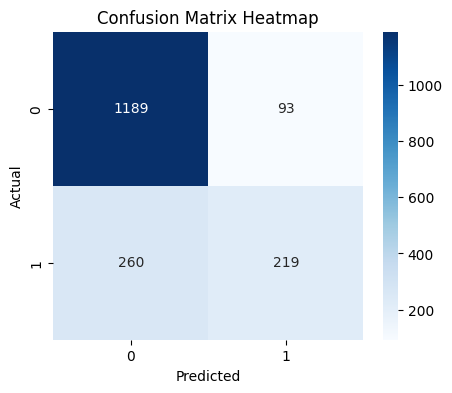

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving telco_churn_raw.csv.csv to telco_churn_raw.csv (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols, cat_cols

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object'),
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object'))

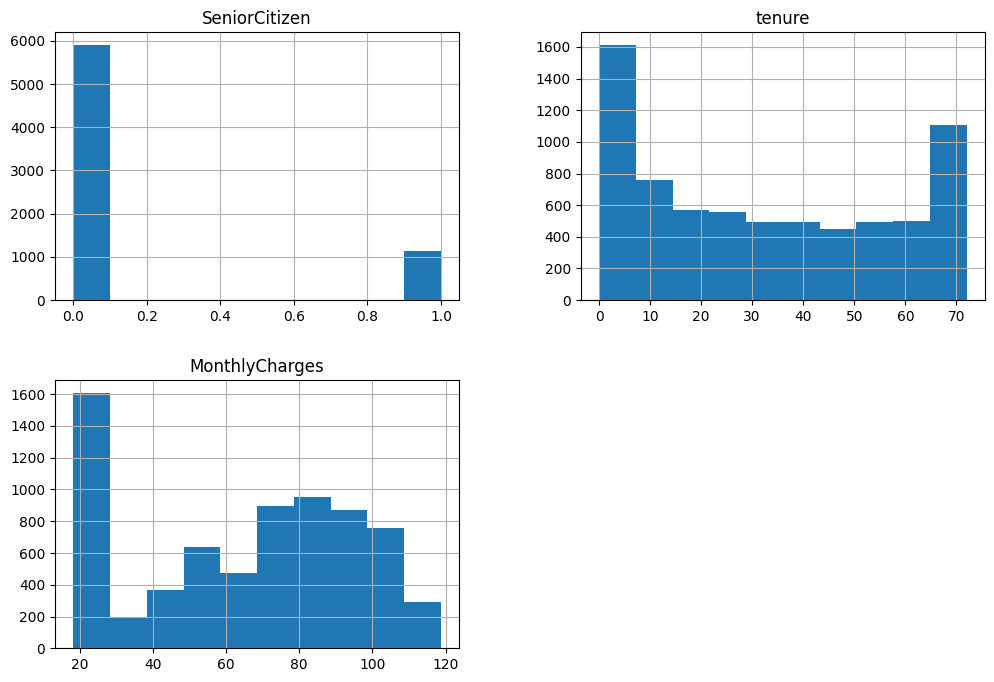

In [ ]:
import matplotlib.pyplot as plt
df[num_cols].hist(figsize=(12,8))
plt.show()

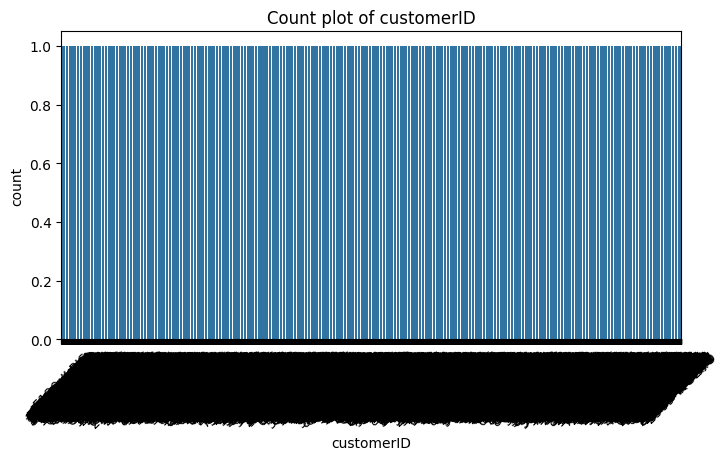

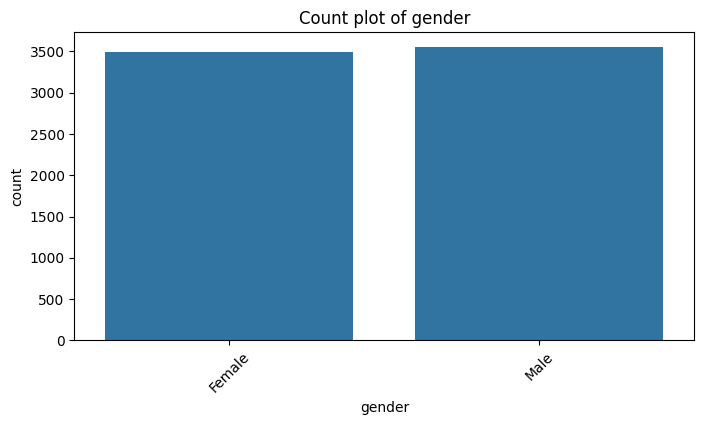

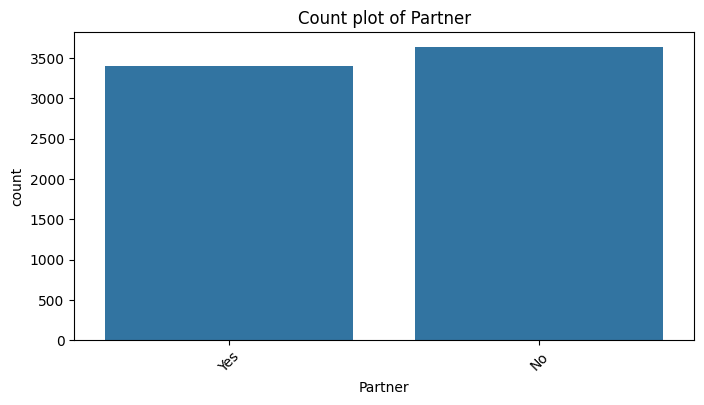

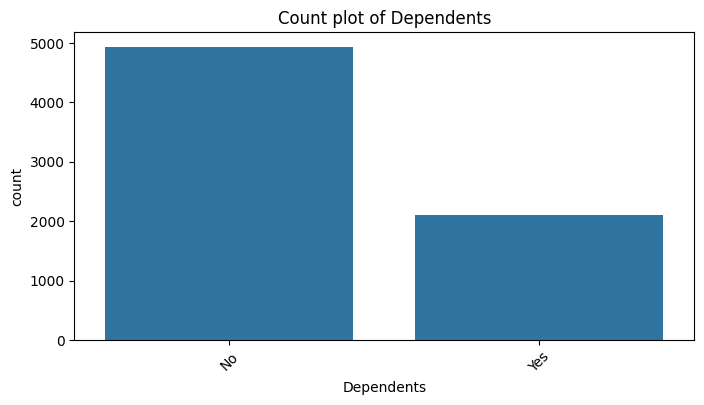

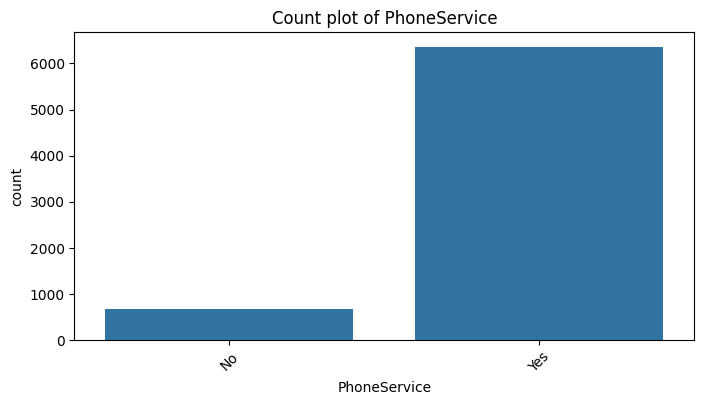

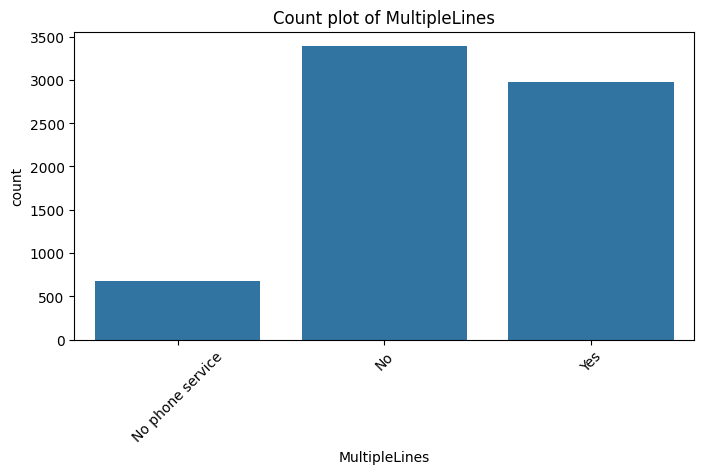

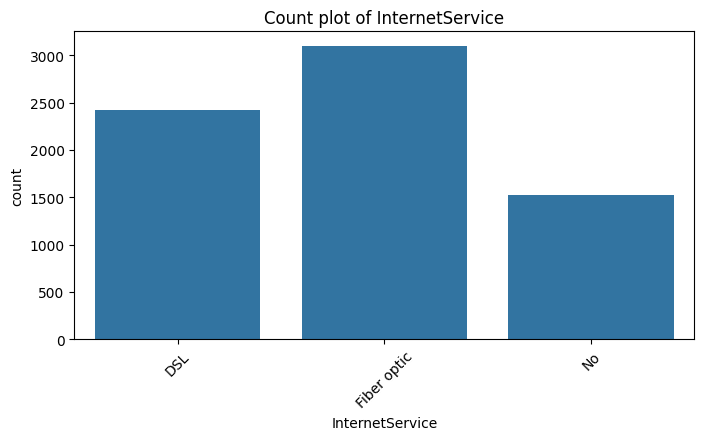

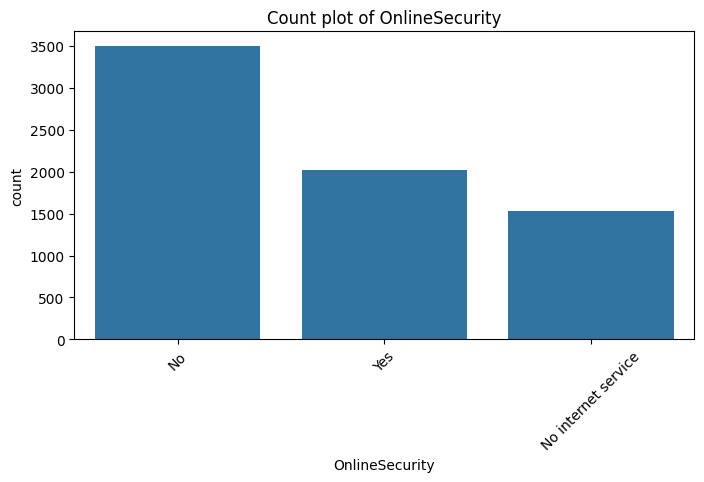

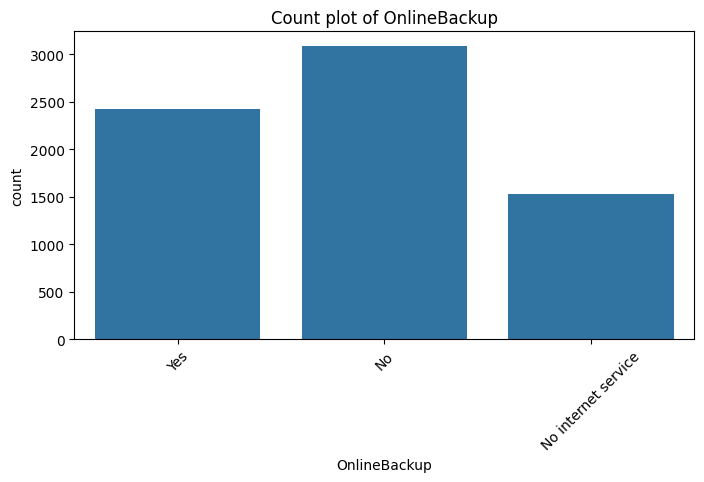

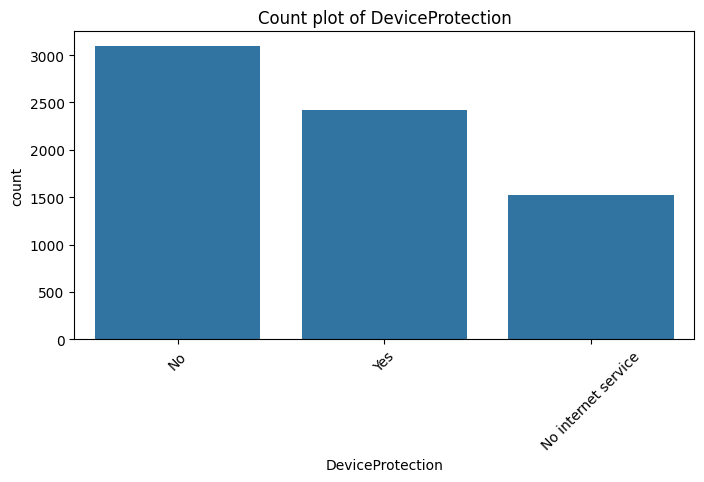

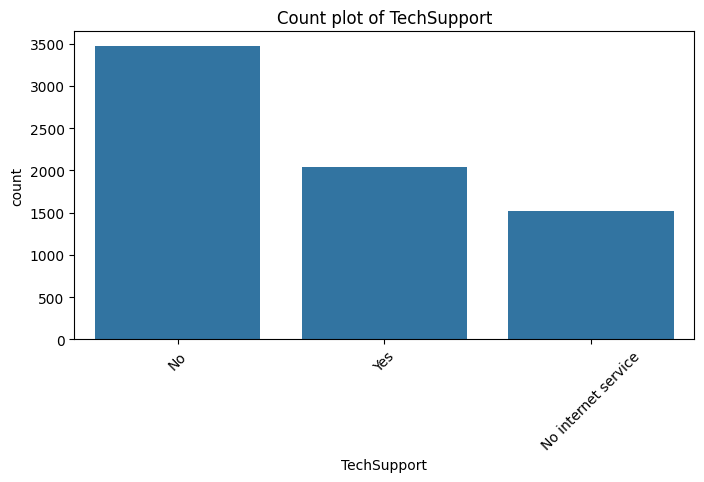

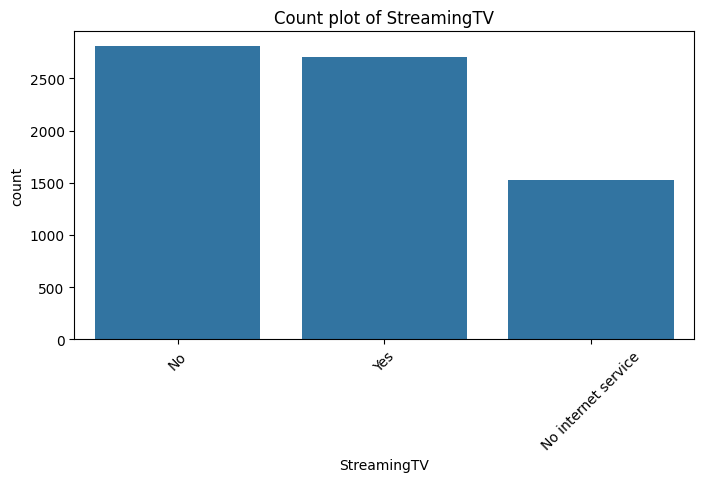

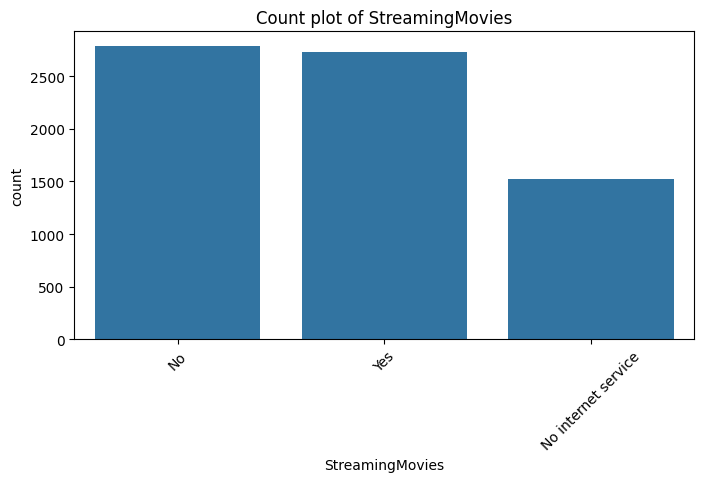

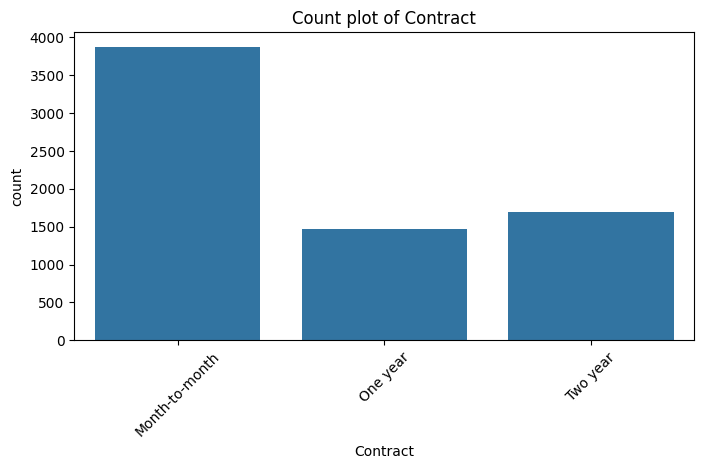

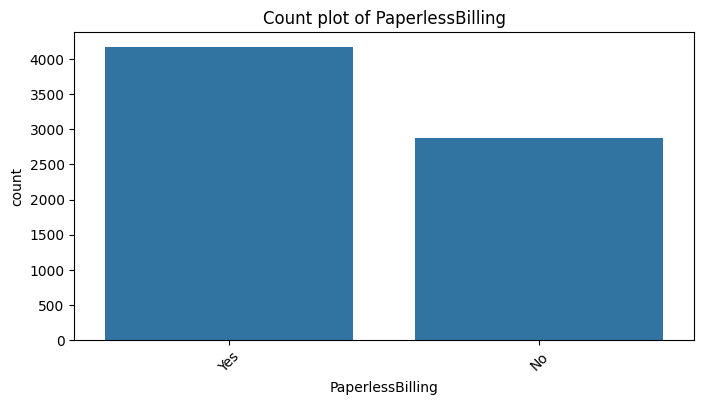

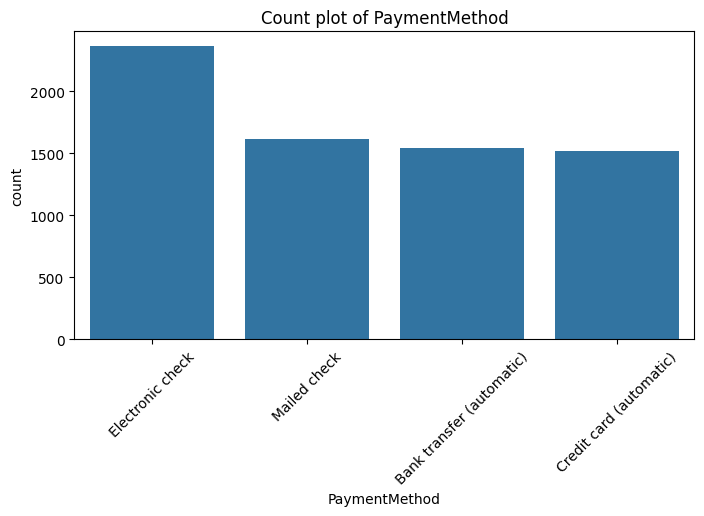

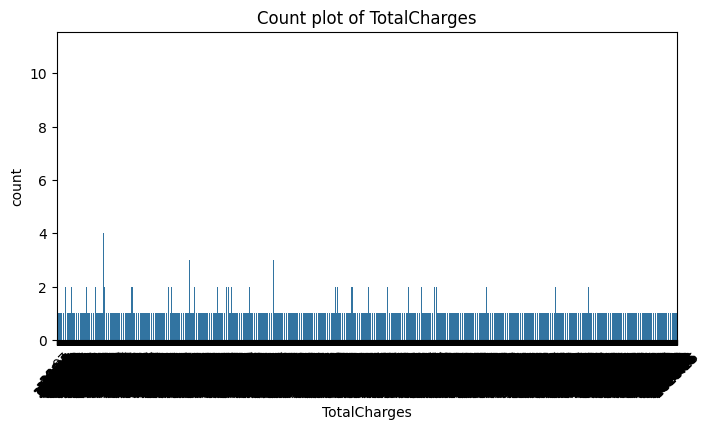

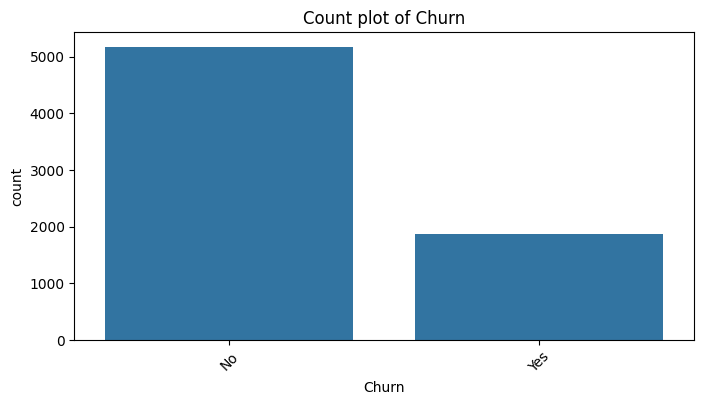

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_cols:
  plt.figure(figsize=(8,4))
  sns.countplot(data=df, x=col)
  plt.title(f"Count plot of {col}")
  plt.xticks(rotation=45)
  plt.show()

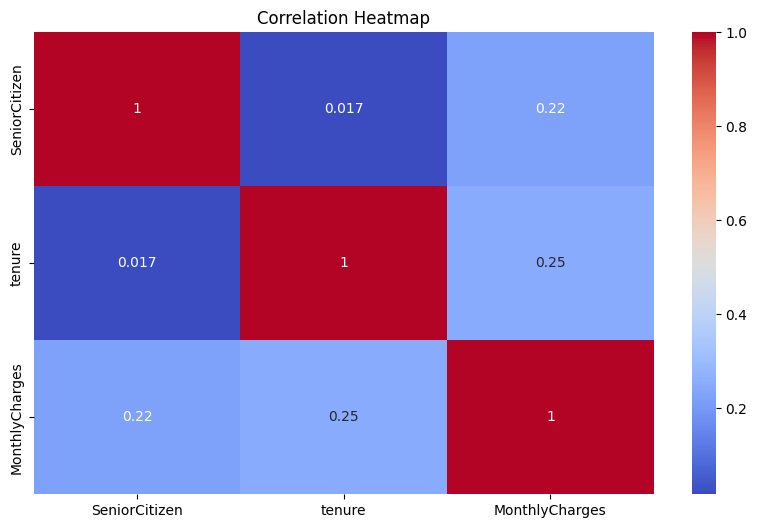

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving telco_churn_raw.csv.csv to telco_churn_raw.csv (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols,cat_cols

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object'),
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object'))

In [ ]:
for col in num_cols:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
import numpy as np
import pandas as pd

print(">>> Inspect sample of raw TotalCharges values (first 40):")
try:
    print(df['TotalCharges'].head(40).to_list())
except Exception as e:
    print("ERROR accessing df['TotalCharges']: ", e)

# Create a debug view of problematic entries (non-numeric-looking)
s = df['TotalCharges'].astype(str)

# Normalize common invisible characters (non-breaking space), remove currency symbols and commas
s_clean = s.str.replace(r'[\u00A0\u200B]', '', regex=True)   # NBSP / zero-width
s_clean = s_clean.str.replace(r'[,₹\$\£]', '', regex=True)   # commas and common currency symbols
s_clean = s_clean.str.strip()

# Show a sample of values that DO NOT match a numeric pattern
is_numeric_like = s_clean.str.match(r'^-?\d+(\.\d+)?$')
non_numeric_sample = s_clean[~is_numeric_like].drop_duplicates().head(50)
print("\n>>> Sample non-numeric-looking values (after cleaning):")
print(non_numeric_sample.to_list())

# Now convert: treat empty strings, 'None', 'nan' as NaN, then coerce to float
s_clean = s_clean.replace({'': np.nan, 'None': np.nan, 'none': np.nan, 'nan': np.nan})

# Assign back temporarily so we can inspect
df['_TotalCharges_tmp'] = s_clean

print("\n>>> Converting to numeric with to_numeric(errors='coerce') ...")
df['TotalCharges'] = pd.to_numeric(df['_TotalCharges_tmp'], errors='coerce')

# Diagnostics after conversion
print("\n>>> dtype after conversion:", df['TotalCharges'].dtype)
print(">>> Count total rows:", len(df))
print(">>> Count of NaNs in TotalCharges after conversion:", df['TotalCharges'].isna().sum())
print(">>> Some converted values (first 20):")
print(df['TotalCharges'].head(20).to_list())

# If many became NaN, fill with median (safe) — comment/uncomment depending on your choice
if df['TotalCharges'].isna().sum() > 0:
    med = df['TotalCharges'].median()
    print(f"\n>>> Filling {df['TotalCharges'].isna().sum()} NaNs with median = {med:.2f}")
    df['TotalCharges'] = df['TotalCharges'].fillna(med)

# Cleanup
if '_TotalCharges_tmp' in df.columns:
    df.drop(columns=['_TotalCharges_tmp'], inplace=True)

print("\n>>> Final dtype check:")
print(df.dtypes[['TotalCharges']])

>>> Inspect sample of raw TotalCharges values (first 40):
['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8', '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25', '528.35', '1862.9', '39.65', '202.25', '20.15', '3505.1', '2970.3', '1530.6', '4749.15', '30.2', '6369.45', '1093.1', '6766.95', '181.65', '1874.45', '20.2', '45.25', '7251.7', '316.9', '3548.3', '3549.25', '1105.4']

>>> Sample non-numeric-looking values (after cleaning):
['']

>>> Converting to numeric with to_numeric(errors='coerce') ...

>>> dtype after conversion: float64
>>> Count total rows: 7043
>>> Count of NaNs in TotalCharges after conversion: 11
>>> Some converted values (first 20):
[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95, 587.45, 326.8, 5681.1, 5036.3, 2686.05, 7895.15, 1022.95, 7382.25, 528.35, 1862.9]

>>> Filling 11 NaNs with median = 1397.47

>>> Final dtype check:
TotalCharges    float64
dty

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.select_dtypes(include =['object']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = label.fit_transform(df[col].astype(str))

In [ ]:
df.dtypes

,0
customerID,int64
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)   # Features
y = df["Churn"]                # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape, X_test.shape

((5634, 20), (1409, 20))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [ ]:
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8176011355571328

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[929, 107],
       [150, 223]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [ ]:
import pandas as pd
import numpy as np

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': np.abs(model.coef_[0])
})

importance = importance.sort_values(by='Coefficient', ascending=False)
importance

,Feature,Coefficient
15,Contract,0.840505
6,PhoneService,0.559480
16,PaperlessBilling,0.401636
9,OnlineSecurity,0.292823
12,TechSupport,0.260572
2,SeniorCitizen,0.252265
4,Dependents,0.227618
10,OnlineBackup,0.148613
1,gender,0.110848
7,MultipleLines,0.091951


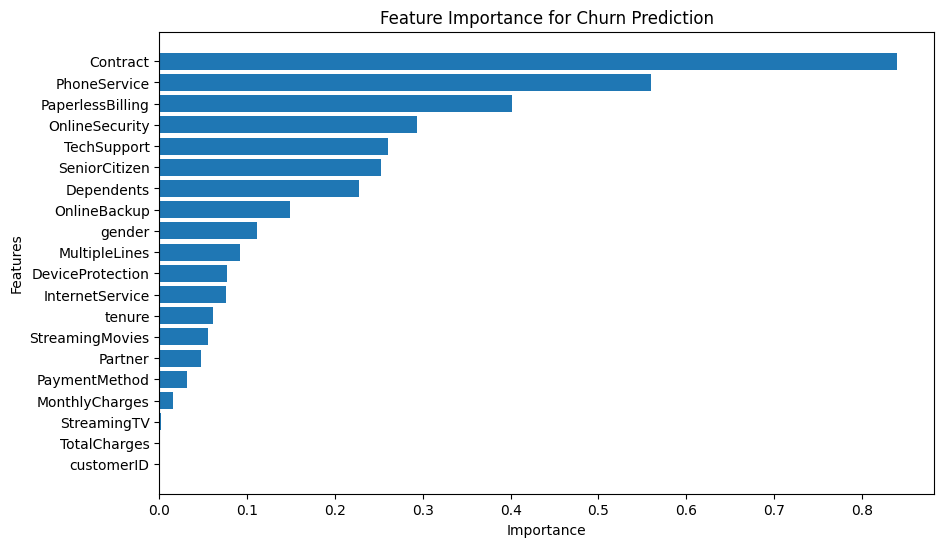

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(importance['Feature'], importance['Coefficient'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Churn Prediction")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
report = f"""
# 📊 Telecom Churn Prediction Project
Machine Learning | Logistic Regression | Google Colab

## 1. Overview
The goal of this project is to predict whether a telecom customer will churn using demographic and service usage features.

## 2. Dataset Details
- Rows: {df.shape[0]}
- Columns: {df.shape[1]}

Features included:
- Customer demographics
- Account information
- Subscription details
- Usage patterns
- Charges (Monthly + Total)

## 3. Data Cleaning Steps Performed
- Removed blank values in TotalCharges
- Converted TotalCharges → float64
- Converted all categorical columns → numeric (Label Encoding)
- Verified numerical types: tenure, monthly charges, total charges

## 4. Model Used
*Logistic Regression*

## 5. Train/Test Split
- 80% training
- 20% testing

## 6. Model Accuracy
- Accuracy: {accuracy:.4f}

## 7. Confusion Matrix
{cm}

## 8. Classification Report
{classification_report(y_test, y_pred)}

## 9. Feature Importance (Top Influencers)
{importance.head(10)}

## 10. Insights
- Customers with short tenure are more likely to churn
- Higher monthly charges increase churn likelihood
- Contract type heavily influences churn (month-to-month churn highest)
- Electronic check payment has higher churn
- Fiber optic service also correlates with churn

## 11. Final Conclusion
The model provides strong predictive insights into customer churn and can help telecom companies take proactive retention actions.

"""

print(report)


# 📊 Telecom Churn Prediction Project  
Machine Learning | Logistic Regression | Google Colab

## 1. Overview
The goal of this project is to predict whether a telecom customer will churn using demographic and service usage features.

## 2. Dataset Details
- Rows: 7043
- Columns: 21

Features included:
- Customer demographics  
- Account information  
- Subscription details  
- Usage patterns  
- Charges (Monthly + Total)

## 3. Data Cleaning Steps Performed
- Removed blank values in TotalCharges
- Converted TotalCharges → float64
- Converted all categorical columns → numeric (Label Encoding)
- Verified numerical types: tenure, monthly charges, total charges

## 4. Model Used
*Logistic Regression*

## 5. Train/Test Split
- 80% training
- 20% testing

## 6. Model Accuracy
- Accuracy: 0.8176

## 7. Confusion Matrix
[[929 107]
 [150 223]]

## 8. Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1   

In [ ]:
df.to_csv('cleaned_telecom_data.csv',index=False)

In [ ]:
from google.colab import files
files.download('cleaned_telecom_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_excel('telecom_churn_cleaned.xlsx',
index=False)

In [ ]:
from google.colab import files
files.download('telecom_churn_cleaned.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>